----------------------------Customer Experience Dataset----------------------

In [3]:
import pandas as pd ; import numpy as np; import matplotlib.pyplot as plt ; import seaborn as sns



In [4]:
# Kaggle den indirdiğim customer_experience_data.csv Veri Setini Yükleme
df = pd.read_csv(r"C:\Users\edayd\OneDrive\Masaüstü\BootcampFinalCase\customer_experience_data.csv")


In [5]:
#Rastgele değerlere bakacağım veriler nasıl görmek için 
df.sample()

,Customer_ID,Age,Gender,Location,Num_Interactions,Feedback_Score,Products_Purchased,Products_Viewed,Time_Spent_on_Site,Satisfaction_Score,Retention_Status,Gender_Encoded,Location_Encoded,Retention_Status_Encoded
812,813,38,Male,Rural,13,3,8,20,29.466165,10,Retained,1,0,1


Customer_ID: Her müşteriye ait benzersiz kimlik numarası.
Age: Müşterinin yaşı.
Gender: Cinsiyeti (Female, Male gibi).
Location: Müşterinin yaşadığı yer tipi (Urban = şehir, Rural = kırsal, Suburban = banliyö vb.).
Num_Interactions: Müşterinin şirketle veya platformla gerçekleştirdiği etkileşim sayısı.
Feedback_Score: Müşterinin verdiği geri bildirim puanı (muhtemelen memnuniyetle ilgili).
Products_Purchased: Satın aldığı ürün sayısı.
Products_Viewed: İncelediği/gezdiği ürün sayısı.
Time_Spent_on_Site: Site veya platformda geçirdiği süre (dakika cinsinden).
Satisfaction_Score: Genel memnuniyet puanı.
Retention_Status: Müşterinin elde tutulup tutulmadığı durumu (Retained = elde tutulmuş, Churned = kaybedilmiş).
Gender_Encoded, Location_Encoded, Retention_Status_Encoded: Yukarıdaki kategorik değişkenlerin sayısal olarak kodlanmış halleri.

Yani, bu veri seti bir şirketin (örneğin e-ticaret, abonelik hizmeti ya da benzeri) müşterilerinin davranışlarını, memnuniyetini ve elde tutulma durumlarını analiz etmek için toplanmış müşteri verilerini içermektedir.


Burada Gender,Location,Retention_Status  etiketlenmiş ama makine öğrenimi için Bazı modeller (örneğin linear regression, neural networks) sayısal değerleri sıralı gibi yorumlar. Yani model 1’in 0’dan büyük olması nedeniyle "erkek"i "kadın"dan üstün bir şey sanabilir. Bu, modele yanlış öncelik sinyali verebilir. Bu durumda get_dummies daha güvenli olurdu. Diğer etiketlenmiş kolonlar için de önemli bir durum. Bu yüzden ham hallerinden ben tekrardan get_dummies yapacağım.

In [6]:
# Veri seti özelliklerini görüntüleme
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               1000 non-null   int64  
 1   Age                       1000 non-null   int64  
 2   Gender                    1000 non-null   object 
 3   Location                  1000 non-null   object 
 4   Num_Interactions          1000 non-null   int64  
 5   Feedback_Score            1000 non-null   int64  
 6   Products_Purchased        1000 non-null   int64  
 7   Products_Viewed           1000 non-null   int64  
 8   Time_Spent_on_Site        1000 non-null   float64
 9   Satisfaction_Score        1000 non-null   int64  
 10  Retention_Status          1000 non-null   object 
 11  Gender_Encoded            1000 non-null   int64  
 12  Location_Encoded          1000 non-null   int64  
 13  Retention_Status_Encoded  1000 non-null   int64  
dtypes: float6

In [7]:
# One-hot encoding uygulanacak sütunlar
categorical_columns = ['Gender', 'Location', 'Retention_Status']


df= pd.get_dummies(df, columns=categorical_columns, prefix=categorical_columns)
cols_to_drop = ['Gender_Encoded', 'Location_Encoded', 'Retention_Status_Encoded']
df.drop(columns=cols_to_drop, inplace=True)

# Sonucu göster
print("One-Hot Encoding Sonrası Veri Seti:")
print(f"Orijinal sütun sayısı: {df.shape[1]}")
print(f"Encoding sonrası sütun sayısı: {df.shape[1]}")
print(f"Eklenen sütun sayısı: {df.shape[1] - df.shape[1]}")




One-Hot Encoding Sonrası Veri Seti:
Orijinal sütun sayısı: 15
Encoding sonrası sütun sayısı: 15
Eklenen sütun sayısı: 0


In [8]:
df.columns

Index(['Customer_ID', 'Age', 'Num_Interactions', 'Feedback_Score',
       'Products_Purchased', 'Products_Viewed', 'Time_Spent_on_Site',
       'Satisfaction_Score', 'Gender_Female', 'Gender_Male', 'Location_Rural',
       'Location_Suburban', 'Location_Urban', 'Retention_Status_Churned',
       'Retention_Status_Retained'],
      dtype='object')

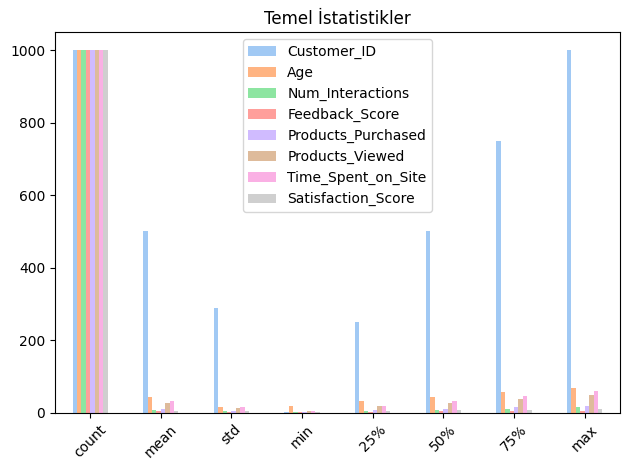

In [13]:
colors = sns.color_palette("pastel", n_colors=len(df.describe().columns))
df.describe().plot(kind='bar', color=colors)
plt.title("Temel İstatistikler")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
df.to_csv('df.csv', index=False)
